# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [157]:
# Optional, if using Google Colab w/ Drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)



In [158]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "./" 

# utilfn = datadir + "utils.py"
# !cp "$utilfn" .
import utils

In [159]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline  
import matplotlib.pyplot as plt

In [160]:
# im1_file = datadir + 'nutmeg.jpg'
# im2_file = datadir + 'DerekPicture.jpg'
im1_file = datadir + 'results/orig1_input_cait.png'
im2_file = datadir + 'results/orig2_input_cait.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_COLOR) / 255.0)
# im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_COLOR) / 255.0)


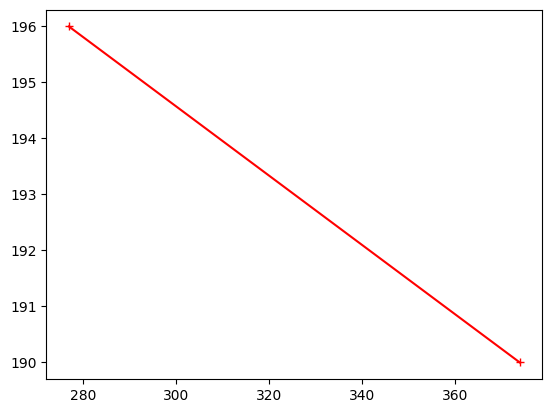

In [161]:
# pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# pts_im1 = np.array([[ 1190, 743], [ 1448, 725]]) # raiden1.jpg
pts_im1 = np.array([[ 277, 196], [ 374, 190]]) # cait1.jpg
# pts_im1 = np.array([[ 0, 0], [ 735, 732]]) # 02-1.jpg
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

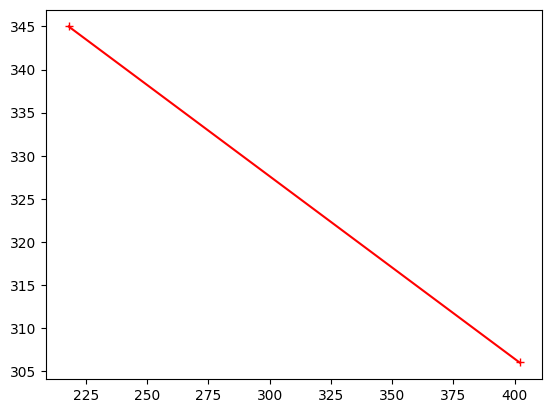

In [162]:
# pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# pts_im2 = np.array([[ 809, 462], [ 1113, 463]]) # raiden2.jpg
pts_im2 = np.array([[ 218, 345], [ 402, 306]]) # cait2.jpg
# pts_im2 = np.array([[ 0, 0], [ 735, 732]]) # 02-2.jpg
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [163]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [164]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) / 255.0
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) / 255.0

(Text(0.5, 1.0, 'Image 2'), [], [])

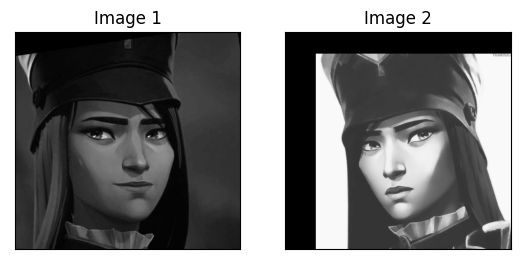

In [165]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([])

In [166]:
from locale import normalize


def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  
    kernal_size = int(np.ceil(sigma_low)*6+1)
    low_pass_kernel = cv2.getGaussianKernel(kernal_size, sigma_low)
    high_pass_kernel = cv2.getGaussianKernel(kernal_size, sigma_high)
    im1_low = cv2.filter2D(im1, -1, low_pass_kernel)
    im2_high = im2 - cv2.filter2D(im2, -1, high_pass_kernel)
    # plt.imshow(im1_low)
    plt.imshow(im2_high)
    compose = im1_low + im2_high
    compose = cv2.normalize(compose, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
    return compose

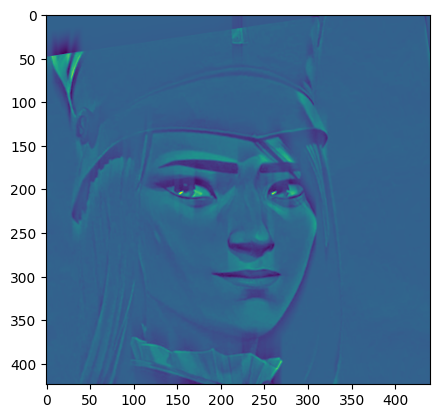

In [167]:
sigma_low = 10 # choose parameters that work for your images
sigma_high = 20
# raiden: 25, 20
# cait: 10, 20
# 02: 6, 16
# im1 = np.array([im1, im1, im1])
# np.moveaxis(im1, 0, -1).shape
im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


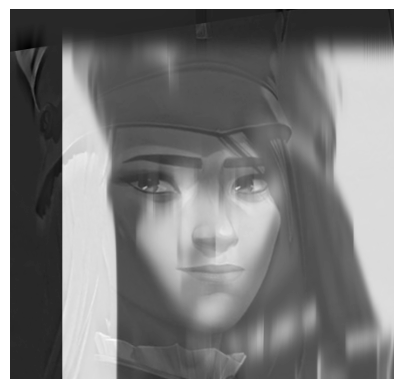

In [168]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

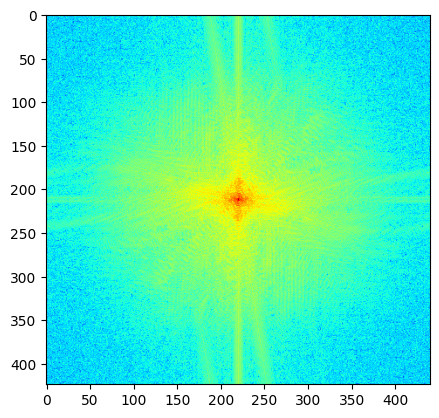

In [169]:
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im1)))
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

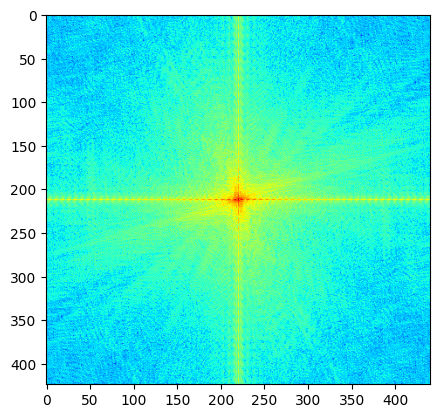

In [170]:
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im2)))
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

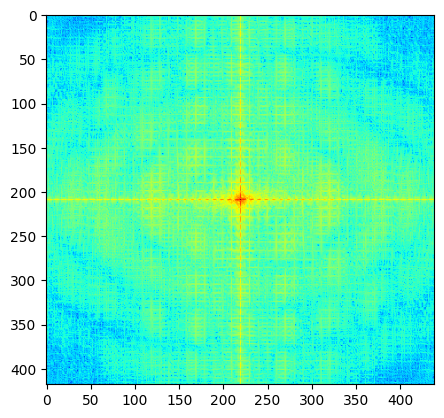

In [171]:
im_tmp = cv2.imread("./results/output2-low.png", cv2.IMREAD_GRAYSCALE)
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_tmp)))
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

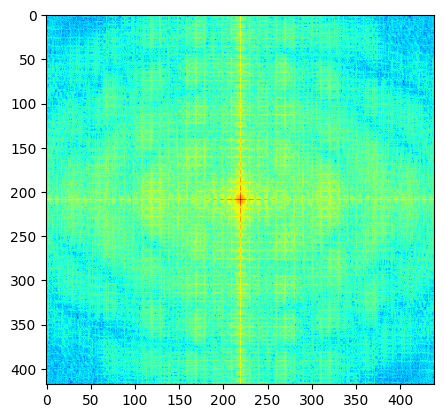

In [172]:
im_tmp = cv2.imread("./results/output2-high.png", cv2.IMREAD_GRAYSCALE)
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_tmp)))
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

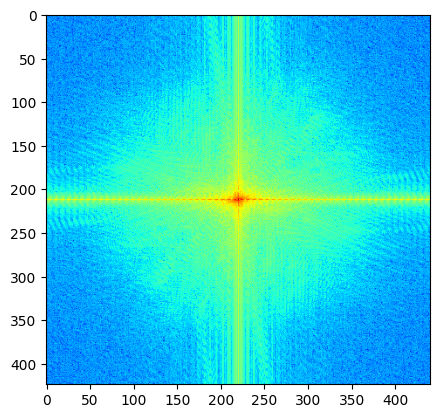

In [173]:
fftmag = np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))
plt.imshow(fftmag,norm=LogNorm(fftmag.min(),fftmag.max()),cmap='jet')

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

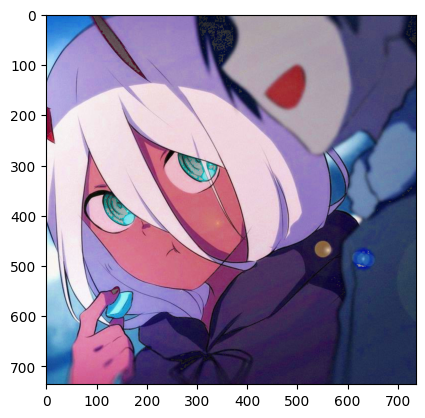

In [174]:
# Idea: Change to HSV, increase saturation
im_file = datadir + 'results/orig1_input_02.jpg'
# im = np.float32(cv2.imread(im_file, cv2.IMREAD_COLOR) / 255.0)
im = cv2.imread(im_file, cv2.IMREAD_COLOR)
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
im[:,:,1] = im[:,:,1] * 1.7
# im = np.float32(im)# / 255.0
im = cv2.cvtColor(im, cv2.COLOR_HSV2RGB)
cv2.normalize(im, im, 0, 255, cv2.NORM_MINMAX)
plt.imshow(im)

#### Color shift

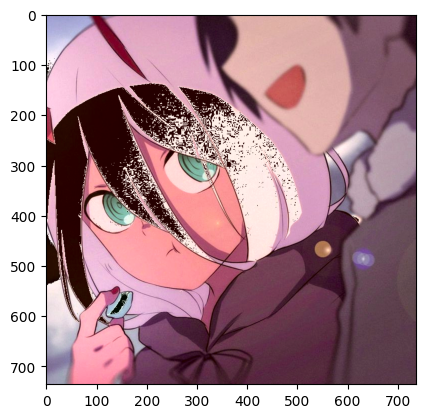

In [214]:

# Idea: Change to LAB, increase saturation
im_file = datadir + 'results/orig1_input_02.jpg'
# im = np.float32(cv2.imread(im_file, cv2.IMREAD_COLOR) / 255.0)
im = cv2.imread(im_file, cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)

# Use masks
im_redmask = im[:,:,1] > 0
# im_redmask = im[:,:,1] < 128
im[im_redmask] = im[im_redmask] * 1.1
# cv2.normalize(im, im, -128, 128, cv2.NORM_MINMAX)
# cv2.normalize(im, im, 0, 255, cv2.NORM_MINMAX)
im = cv2.cvtColor(im, cv2.COLOR_LAB2RGB)
# im = np.float32(im)# / 255.0
plt.imshow(im)

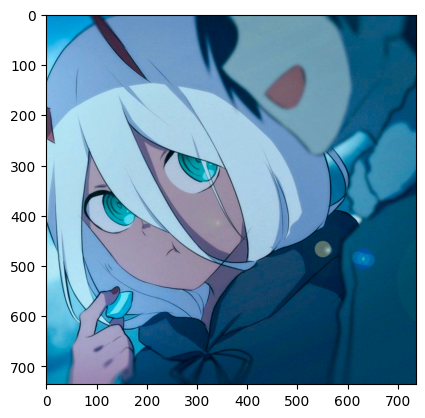

In [216]:
# Set image to less yellow
im_file = datadir + 'results/orig1_input_02.jpg'
im = cv2.imread(im_file, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
im2_yelmask = im[:,:,2] > 0
im2[im2_yelmask] = im2[im2_yelmask] * 0.9

# im2[:,:,0] = im2[:,:,0] * 1.0
# im2[:,:,1] = im2[:,:,1] * 1.0
# im2[:,:,2] = im2[:,:,2] * 1.0

im2 = cv2.cvtColor(im2, cv2.COLOR_LAB2RGB)
cv2.normalize(im2, im2, 0, 255, cv2.NORM_MINMAX)
plt.imshow(im2)